<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 9 </b></center>
<center><b><h2>K-means, K-Medoids</b></center>
<center><b><h1>Patel Viraj</b></center>    
<center><b><h1>22010101148</b></center>    
<center><b><h1>4-2-25</b></center>  
<pre>    

# Step 1: Import Libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


# Step 2: Load the Dataset
Load Given dataset -  StudentsPerformance.csv

In [136]:
data = pd.read_csv("StudentsPerformance.csv")

In [138]:
data

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [141]:
print(data.head())
print("--------------------")
print(data.info())
print("--------------------")
print(data.isnull().sum())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                      

# Step 4: Display PairPlot

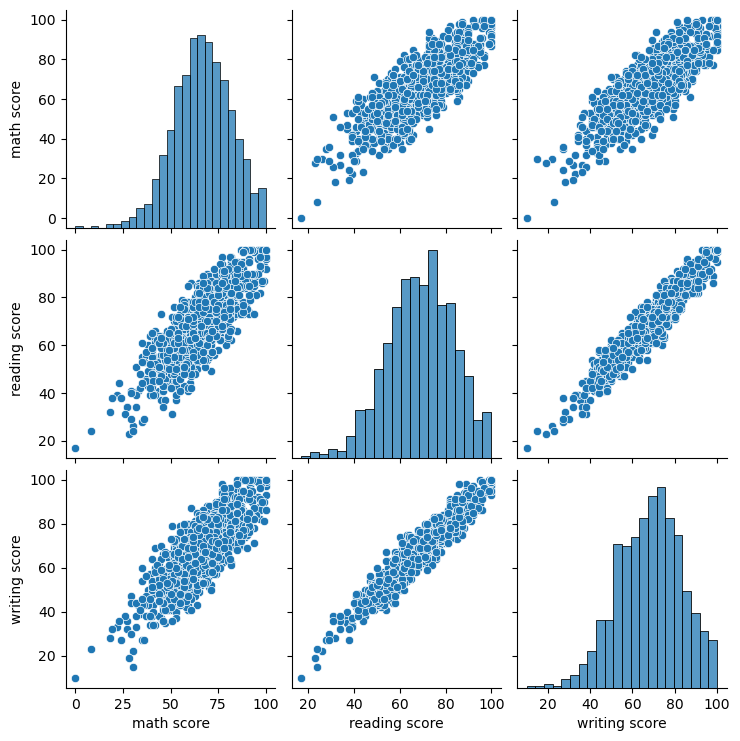

In [144]:
sns.pairplot(data)
plt.show()

# Step 5: Correlation heatmap

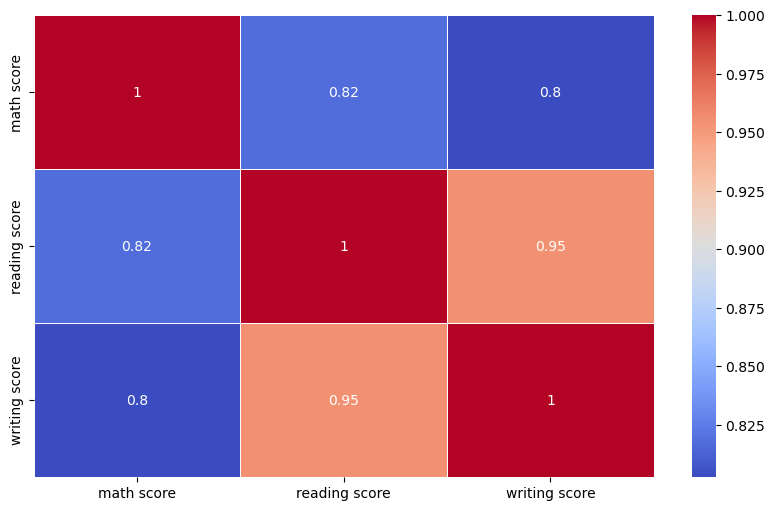

In [147]:
data_numeric = data.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Step 6: Distribution of numerical features

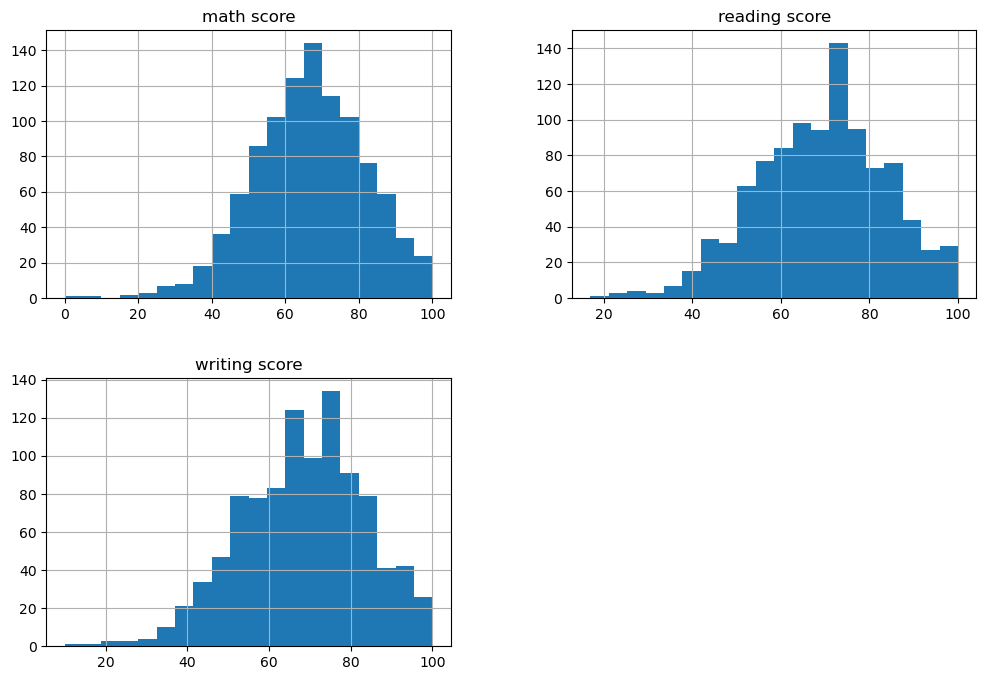

In [150]:
data.hist(figsize=(12, 8), bins=20)
plt.show()

# Step 7: Apply StandardScaler

In [153]:
scaler = StandardScaler()
x = scaler.fit_transform(data.select_dtypes(include=[np.number]))

# Step 8: Elbow method to find optimal k

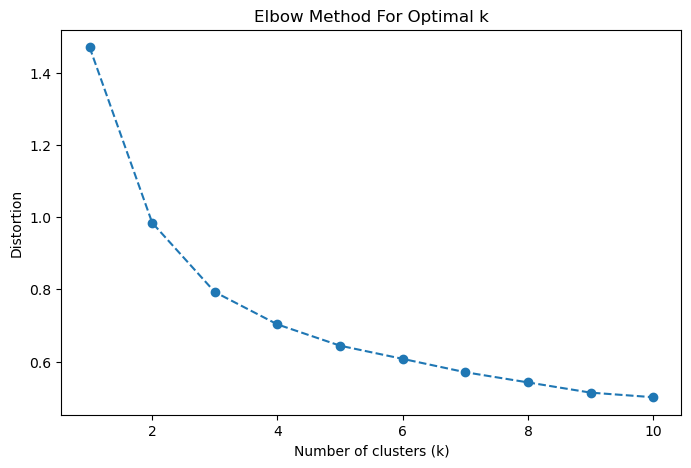

In [156]:
distortions = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

# Step 9:Based on the elbow plot, choose an appropriate k value (e.g., k=3)

In [159]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)
data['cluster'] = kmeans.labels_

# Step 10: Print Cluster Center

In [162]:
print(data['cluster'].value_counts())
print("Cluster Centers:")
print(kmeans.cluster_centers_)

cluster
0    443
2    308
1    249
Name: count, dtype: int64
Cluster Centers:
[[-0.04951336 -0.04870596 -0.01529686]
 [-1.18720058 -1.26762535 -1.28838441]
 [ 1.03099793  1.09485536  1.06358515]]


# Step 11: Plot Cluster

In [165]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=data['cluster'], palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Step 12:Analyze clusters 

In [168]:
data.select_dtypes(include=['number']).groupby('cluster').mean()

math score  reading score  writing score
cluster                                          
0         65.338600      68.458239      67.821670
1         48.096386      50.670683      48.485944
2         81.714286      85.146104      84.207792

# Step 13: Perform K-Medoids

In [171]:
from sklearn_extra.cluster import KMedoids

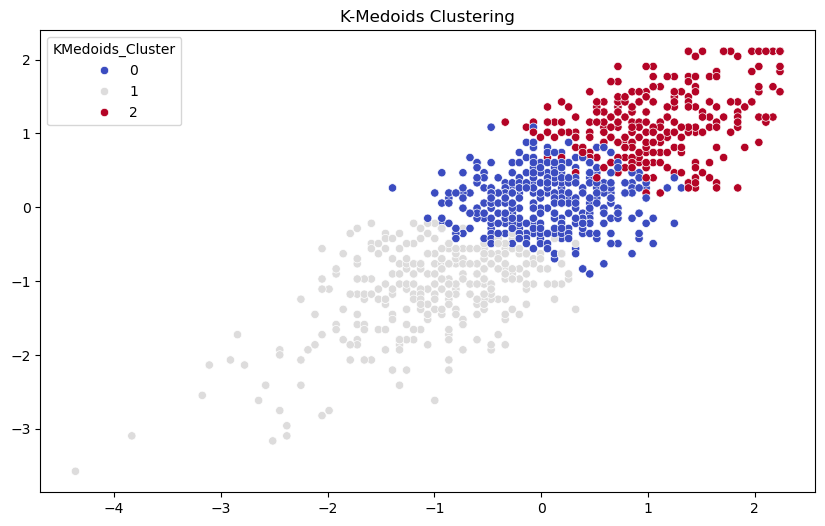

In [173]:
kmedoids = KMedoids(n_clusters=3, random_state=42)
data['KMedoids_Cluster'] = kmedoids.fit_predict(x)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=data['KMedoids_Cluster'], palette='coolwarm')
plt.title("K-Medoids Clustering")
plt.show()

# Step:14 Comparison of K-means and K-medoids Clusters

Silhouette Score for K-Means: 0.4060
Silhouette Score for K-Medoids: 0.3963


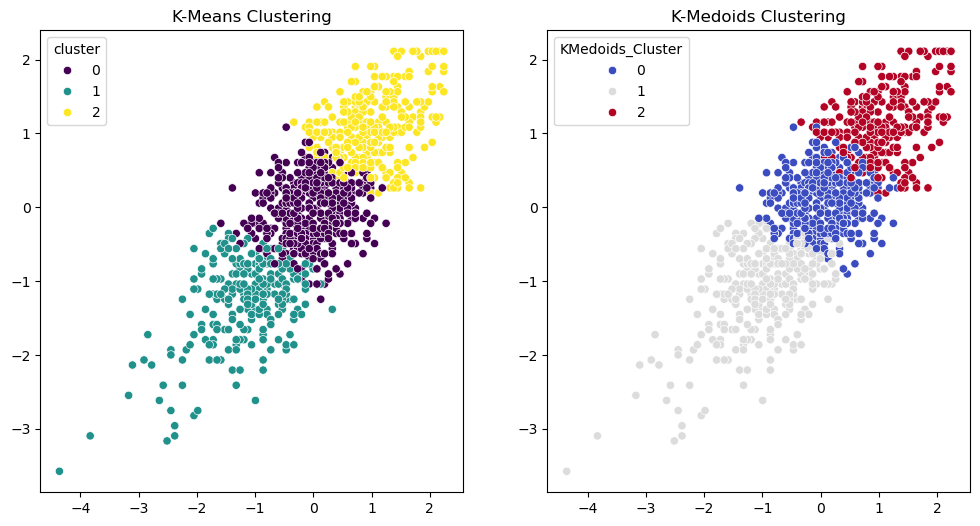

In [176]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for both clustering methods
kmeans_silhouette = silhouette_score(x, data['cluster'])
kmedoids_silhouette = silhouette_score(x, data['KMedoids_Cluster'])

print(f"Silhouette Score for K-Means: {kmeans_silhouette:.4f}")
print(f"Silhouette Score for K-Medoids: {kmedoids_silhouette:.4f}")

# Compare clustering results visually
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# K-Means Clustering
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=data['cluster'], palette='viridis', ax=axes[0])
axes[0].set_title("K-Means Clustering")

# K-Medoids Clustering
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=data['KMedoids_Cluster'], palette='coolwarm', ax=axes[1])
axes[1].set_title("K-Medoids Clustering")

plt.show()

# Step: 15 Implement K- Means with Library
# Sample data points
data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = np.array([
    [1, 2], [2, 3], [3, 4], 
    [10, 11], [11, 12], [12, 13], 
    [50, 51], [51, 52], [52, 53]
])

In [181]:
k=3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


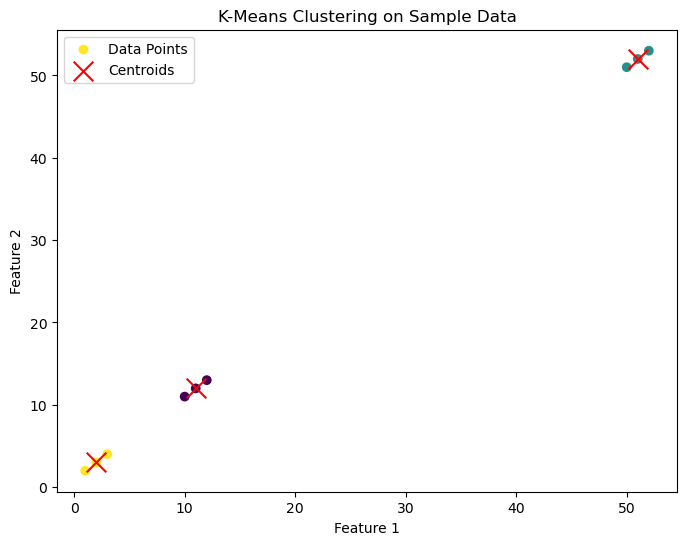

In [183]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label="Data Points")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroids")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering on Sample Data")
plt.legend()
plt.show()

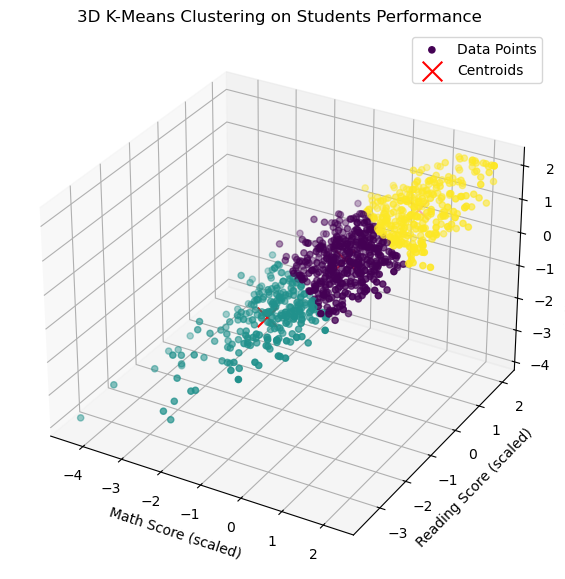

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("StudentsPerformance.csv")

# Selecting three numerical features for 3D clustering
features = ["math score", "reading score", "writing score"]
x = data[features].values

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply K-Means with 3 clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(x_scaled)

# Get cluster labels and centroids
labels = data['Cluster']
centroids = kmeans.cluster_centers_

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for clustered data points
ax.scatter(x_scaled[:, 0], x_scaled[:, 1], x_scaled[:, 2], c=labels, cmap='viridis', marker='o', label="Data Points")

# Scatter plot for centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=200, label="Centroids")

# Labels and title
ax.set_xlabel("Math Score (scaled)")
ax.set_ylabel("Reading Score (scaled)")
ax.set_zlabel("Writing Score (scaled)")
ax.set_title("3D K-Means Clustering on Students Performance")

plt.legend()
plt.show()
